
# Practice Question Answers – Week 8: Logistic Regression and Clustering


Threshold: 0.1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.5
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.7
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Threshold: 0.9
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Glass Dataset - Threshold: 0.1
Accuracy: 0.6046511627906976
Precision: 0.39285714285714285
Recall: 1.0

Glass Dataset - Threshold: 0.3
Accuracy: 0.7441860465116279
Precision: 0.5
Recall: 0.9090909090909091

Glass Dataset - Threshold: 0.5
Accuracy: 0.8372093023255814
Precision: 0.7
Recall: 0.6363636363636364

Glass Dataset - Threshold: 0.7
Accuracy: 0.7906976744186046
Precision: 0.75
Recall: 0.2727272727272727

Glass Dataset - Threshold: 0.9
Accuracy: 0.7441860465116279
Precision: 0.0
Recall: 0.0


c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


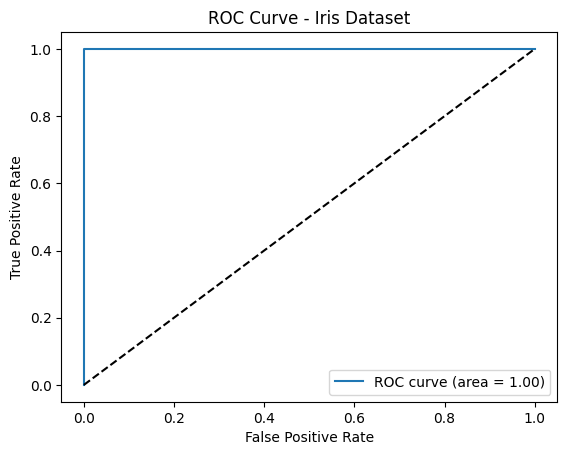

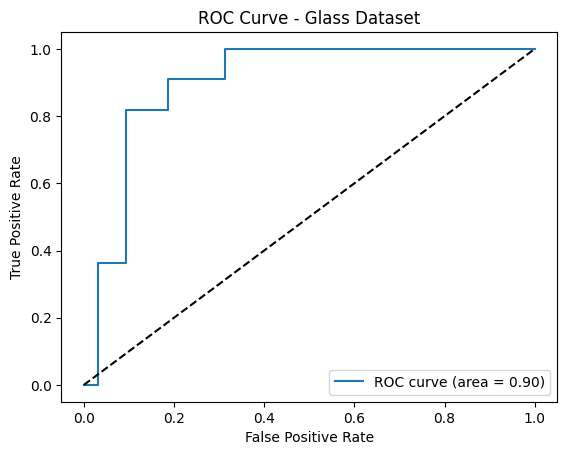

In [1]:
# Homework Assignment Week 8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = pd.read_csv('iris.csv')
glass = pd.read_csv('glass.csv')

# Logistic Regression Section

# Question 1: Try different thresholds for computing predictions on Iris dataset

# Prepare binary target
iris_binary = iris.copy()
iris_binary['target'] = (iris_binary['Name'] == 'Iris-setosa').astype(int)
X = iris_binary.drop(['Name', 'target'], axis=1)
y = iris_binary['target']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities
probs = model.predict_proba(X_test_scaled)[:, 1]

# Try different thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

for t in thresholds:
    preds = (probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))

# Question 2: Do the same analysis for other columns (Glass Dataset)

# Prepare binary target for glass dataset
glass_binary = glass.copy()
glass_binary['target'] = (glass_binary['Type'] == 1).astype(int)
X_glass = glass_binary.drop(['Type', 'target'], axis=1)
y_glass = glass_binary['target']

# Train/Test Split
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_glass, y_glass, test_size=0.2, random_state=42)

# Preprocessing
scaler_glass = StandardScaler()
Xg_train_scaled = scaler_glass.fit_transform(Xg_train)
Xg_test_scaled = scaler_glass.transform(Xg_test)

# Question 3: Fit Logistic Regression Model
glass_model = LogisticRegression()
glass_model.fit(Xg_train_scaled, yg_train)

# Predict probabilities
probs_glass = glass_model.predict_proba(Xg_test_scaled)[:, 1]

# Try different thresholds
for t in thresholds:
    preds_glass = (probs_glass >= t).astype(int)
    print(f"\nGlass Dataset - Threshold: {t}")
    print("Accuracy:", accuracy_score(yg_test, preds_glass))
    print("Precision:", precision_score(yg_test, preds_glass))
    print("Recall:", recall_score(yg_test, preds_glass))

# Question 4: Plot ROC Curves for each model

# ROC for Iris
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Iris Dataset')
plt.legend(loc='lower right')
plt.show()

# ROC for Glass
fpr_glass, tpr_glass, _ = roc_curve(yg_test, probs_glass)
roc_auc_glass = auc(fpr_glass, tpr_glass)

plt.figure()
plt.plot(fpr_glass, tpr_glass, label=f"ROC curve (area = {roc_auc_glass:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Glass Dataset')
plt.legend(loc='lower right')
plt.show()



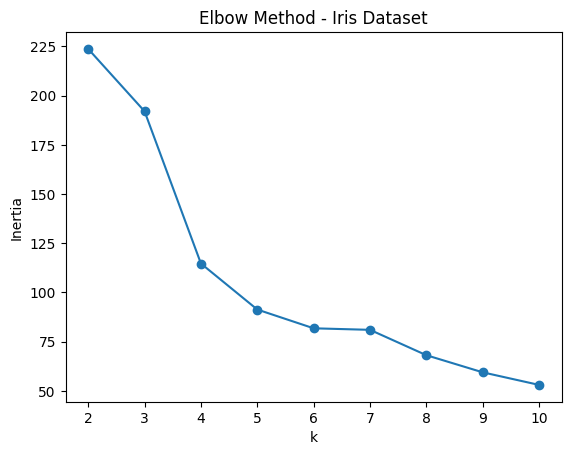

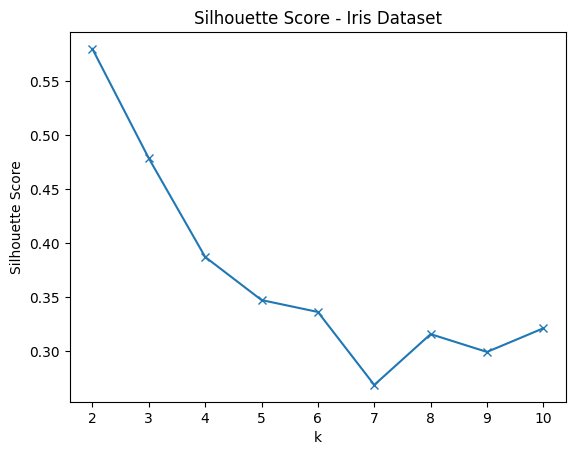

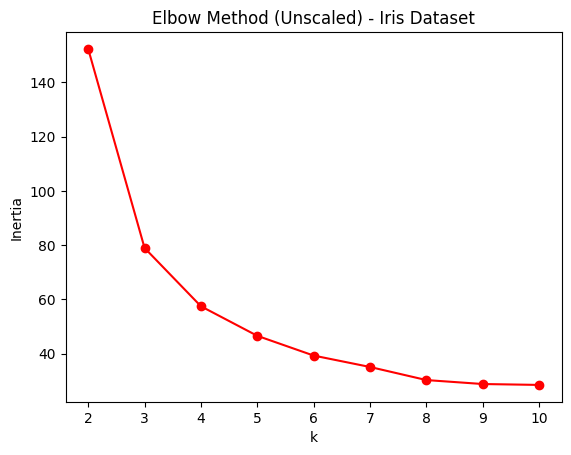

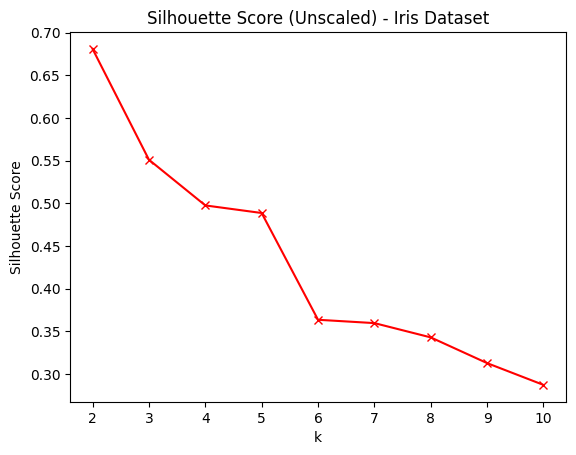

There may not be one perfect value for k. A good value of k is often identified using the 'elbow method' (where inertia sharply drops) OR using the maximum silhouette score.
Based on the values observed from the elbow method and also the silhouette scores, it seems that k=2 or 3 can be considered as right k values.
Food nutrients dataset is not available on the repo?


In [2]:
# Clustering Section

# Question 1: Repeat clustering for different values of k (Iris Dataset)

# Standardize features
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(iris.drop('Name', axis=1))

inertia = []
silhouette = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_cluster, kmeans.labels_))

# Plot Inertia
plt.figure()
plt.plot(ks, inertia, marker='o')
plt.title('Elbow Method - Iris Dataset')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette
plt.figure()
plt.plot(ks, silhouette, marker='x')
plt.title('Silhouette Score - Iris Dataset')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

# Question 2: What if you don't scale your features?

X_cluster_unscaled = iris.drop('Name', axis=1)

inertia_unscaled = []
silhouette_unscaled = []

for k in ks:
    kmeans_unscaled = KMeans(n_clusters=k, random_state=42)
    kmeans_unscaled.fit(X_cluster_unscaled)
    inertia_unscaled.append(kmeans_unscaled.inertia_)
    silhouette_unscaled.append(silhouette_score(X_cluster_unscaled, kmeans_unscaled.labels_))

# Plot Inertia Unscaled
plt.figure()
plt.plot(ks, inertia_unscaled, marker='o', color='red')
plt.title('Elbow Method (Unscaled) - Iris Dataset')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Unscaled
plt.figure()
plt.plot(ks, silhouette_unscaled, marker='x', color='red')
plt.title('Silhouette Score (Unscaled) - Iris Dataset')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

# Question 3: Is there a 'right' k? Why or why not?

# Answer:
print("There may not be one perfect value for k. A good value of k is often identified using the 'elbow method' (where inertia sharply drops) OR using the maximum silhouette score.")
print("Based on the values observed from the elbow method and also the silhouette scores, it seems that k=2 or 3 can be considered as right k values.")

# Question 4: Repeat the clustering exercise for food nutrients dataset
print('Food nutrients dataset is not available on the repo?')

